Exercise I: Introductory Lectures

Parsa Youssefpour

# **Part A**



###**Exercise 3.7**

> Imagine that you are designing a robot to run a maze. You decide to give it a reward of +1 for escaping from the maze and a reward of zero at all other times. The task seems to break down naturally into episodes—the successive runs through the maze—so you decide to treat it as an episodic task, where the goal is to maximize expected total reward (3.7). After running the learning agent for a while, you find that it is showing no improvement in escaping from the maze. What is going wrong? Have you effectively communicated to the agent what you want it to achieve?



###**Answer 3.7**

> I believe that the main issue in this RL model is the lack of negative rewards. This means that since the, reward for anyaction other than escaping the maze is 0, the robot can get stuck in a loop and never break out of it. It would be difficult for the model to learn the optimal path without smaller intermediate rewards to help the model find it path faster.

---



### **Exercise 3.8**

>  Suppose γ =0.5 and the following sequence of rewards is received R1 = -1, R2 = 2, R3 = 6, R4 = 3, and R5 = 2 with T = 5. What are G0, G1, ... G5? Hint: Work backwards.



### **Answer 3.8**

There is no G5 as there is no R6

G4 = 2

G3 = 3 + 0.5 * 2 = 4

G2 = 6 + 0.5 * 3 + 0.5^2 * 2 = 8

G1 = 2 + 0.5 * G2 = 6

G0 = -1 + 0.5 * G1 = 2

---

### **Exercise 3.9**

> Suppose γ =0.9 and the reward squence is R1 = 2 followed by an infinite sequence of 7s. What are G1 and G0?



### **Answer 3.9**

> G1 = 7 * 1/(1-0.9) = 70

> G0 = 2 + 0.9G1 = 65

---


### **Exercise 3.12**

> Give an equation for vπ in terms of qπ and π.


### **Answer 3.12**

> ∑π(a|s)qπ(s,a)

---

### **Exercise 3.18**

> The value of a state depends on the values of the actions possible in that state and on how likely each action is to be taken under the current policy. We can think of this in terms of a small backup diagram rooted at the state and considering each
possible action:
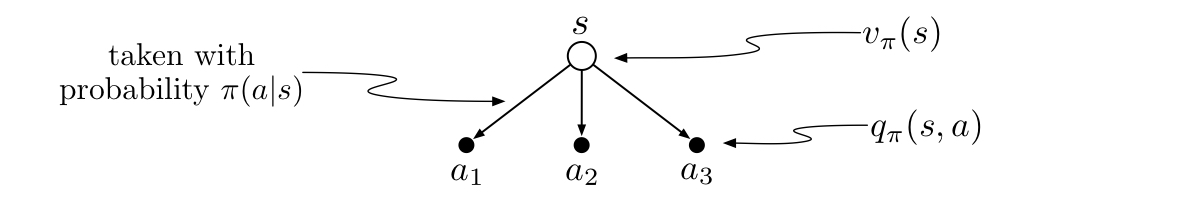


> Give the equation corresponding to this intuition and diagram for the value at the root node, vπ(s), in terms of the value at the expected leaf node, qπ(s, a), given St = s.This equation should include an expectation conditioned on following the policy, π. Then give a second equation in which the expected value is written out explicitly in terms of π(a |s) such that no expected value notation appears in the equation.




### **Answer 3.18**

> vπ(s) = qπ(s, a1)π(a1|s) + qπ(s, a2)π(a2|s) + qπ(s, a3)π(a3|s)

---

### **Exercise 3.19**


> The value of an action, qπ(s, a), depends on the expected next reward and the expected sum of the remaining rewards. Again we can think of this in terms of a small backup diagram, this one rooted at an action (state–action pair) and branching to the possible next states:

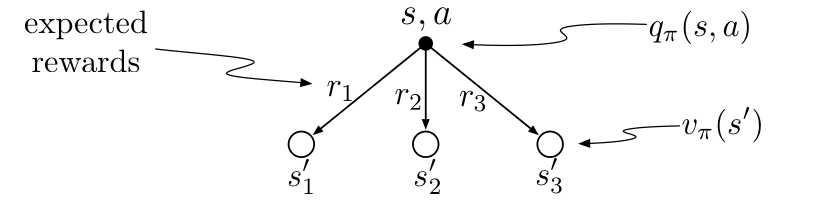

> Give the equation corresponding to this intuition and diagram for the action value, qπ(s, a), in terms of the expected next reward, R_t+1, and the expected next state value, vπ(S_t+1), given that St =s and At =a. This equation should include an expectation but not one conditioned on following the policy. Then give a second equation, writing out the expected value explicitly in terms of p(s',r|s, a)defined by (3.2), such that no expected value notation appears in the equation.


### **Answer 3.19**

> qπ(s, a) = E[r1 + γ*vπ(S1')] + E[r2 + γ*vπ(S2')] +E[r3 + γ*vπ(S3')]


> qπ(s, a) = p(s1',r1|s, a) * [r1 + γ*vπ(S1')] + p(s2',r2|s, a) * [r2 + γ*vπ(S2')] + p(s3',r3|s, a) * [r3 + γ*vπ(S3')]



---

# **Part B**

## **Anatomy**

In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016 - 2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)           #
# 2016 Jan Hakenberg(jan.hakenberg@gmail.com)                         #
# 2016 Tian Jun(tianjun.cpp@gmail.com)                                #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import pickle

BOARD_ROWS = 3
BOARD_COLS = 3
BOARD_SIZE = BOARD_ROWS * BOARD_COLS


class State:
    def __init__(self):
        # the board is represented by an n * n array,
        # 1 represents a chessman of the player who moves first,
        # -1 represents a chessman of another player
        # 0 represents an empty position
        self.data = np.zeros((BOARD_ROWS, BOARD_COLS))
        self.winner = None
        self.hash_val = None
        self.end = None

    # compute the hash value for one state, it's unique
    def hash(self):
        if self.hash_val is None:
            self.hash_val = 0
            for i in np.nditer(self.data):
                self.hash_val = self.hash_val * 3 + i + 1
        return self.hash_val

    # check whether a player has won the game, or it's a tie
    def is_end(self):
        if self.end is not None:
            return self.end
        results = []
        # check row
        for i in range(BOARD_ROWS):
            results.append(np.sum(self.data[i, :]))
        # check columns
        for i in range(BOARD_COLS):
            results.append(np.sum(self.data[:, i]))

        # check diagonals
        trace = 0
        reverse_trace = 0
        for i in range(BOARD_ROWS):
            trace += self.data[i, i]
            reverse_trace += self.data[i, BOARD_ROWS - 1 - i]
        results.append(trace)
        results.append(reverse_trace)

        for result in results:
            if result == 3:
                self.winner = 1
                self.end = True
                return self.end
            if result == -3:
                self.winner = -1
                self.end = True
                return self.end

        # whether it's a tie
        sum_values = np.sum(np.abs(self.data))
        if sum_values == BOARD_SIZE:
            self.winner = 0
            self.end = True
            return self.end

        # game is still going on
        self.end = False
        return self.end

    # @symbol: 1 or -1
    # put chessman symbol in position (i, j)
    def next_state(self, i, j, symbol):
        new_state = State()
        new_state.data = np.copy(self.data)
        new_state.data[i, j] = symbol
        return new_state

    # print the board
    def print_state(self):
        for i in range(BOARD_ROWS):
            print('-------------')
            out = '| '
            for j in range(BOARD_COLS):
                if self.data[i, j] == 1:
                    token = '*'
                elif self.data[i, j] == -1:
                    token = 'x'
                else:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-------------')


def get_all_states_impl(current_state, current_symbol, all_states):
    for i in range(BOARD_ROWS):
        for j in range(BOARD_COLS):
            if current_state.data[i][j] == 0:
                new_state = current_state.next_state(i, j, current_symbol)
                new_hash = new_state.hash()
                if new_hash not in all_states:
                    is_end = new_state.is_end()
                    all_states[new_hash] = (new_state, is_end)
                    if not is_end:
                        get_all_states_impl(new_state, -current_symbol, all_states)


def get_all_states():
    current_symbol = 1
    current_state = State()
    all_states = dict()
    all_states[current_state.hash()] = (current_state, current_state.is_end())
    get_all_states_impl(current_state, current_symbol, all_states)
    return all_states


# all possible board configurations
all_states = get_all_states()


class Judger:
    # @player1: the player who will move first, its chessman will be 1
    # @player2: another player with a chessman -1
    def __init__(self, player1, player2):
        self.p1 = player1
        self.p2 = player2
        self.current_player = None
        self.p1_symbol = 1
        self.p2_symbol = -1
        self.p1.set_symbol(self.p1_symbol)
        self.p2.set_symbol(self.p2_symbol)
        self.current_state = State()

    def reset(self):
        self.p1.reset()
        self.p2.reset()

    def alternate(self):
        while True:
            yield self.p1
            yield self.p2

    # @print_state: if True, print each board during the game
    def play(self, print_state=False):
        alternator = self.alternate()
        self.reset()
        current_state = State()
        self.p1.set_state(current_state)
        self.p2.set_state(current_state)
        if print_state:
            current_state.print_state()
        while True:
            player = next(alternator)
            i, j, symbol = player.act()
            next_state_hash = current_state.next_state(i, j, symbol).hash()
            current_state, is_end = all_states[next_state_hash]
            self.p1.set_state(current_state)
            self.p2.set_state(current_state)
            if print_state:
                current_state.print_state()
            if is_end:
                return current_state.winner


# AI player
class Player:
    # @step_size: the step size to update estimations
    # @epsilon: the probability to explore
    def __init__(self, step_size=0.1, epsilon=0.1):
        self.estimations = dict()
        self.step_size = step_size
        self.epsilon = epsilon
        self.states = []
        self.greedy = []
        self.symbol = 0

    def reset(self):
        self.states = []
        self.greedy = []

    def set_state(self, state):
        self.states.append(state)
        self.greedy.append(True)

    def set_symbol(self, symbol):
        self.symbol = symbol
        for hash_val in all_states:
            state, is_end = all_states[hash_val]
            if is_end:
                if state.winner == self.symbol:
                    self.estimations[hash_val] = 1.0
                elif state.winner == 0:
                    # we need to distinguish between a tie and a lose
                    self.estimations[hash_val] = 0.5
                else:
                    self.estimations[hash_val] = 0
            else:
                self.estimations[hash_val] = 0.5

    # update value estimation
    def backup(self):
        states = [state.hash() for state in self.states]

        for i in reversed(range(len(states) - 1)):
            state = states[i]
            td_error = self.greedy[i] * (
                self.estimations[states[i + 1]] - self.estimations[state]
            )
            self.estimations[state] += self.step_size * td_error

    # choose an action based on the state
    def act(self):
        state = self.states[-1]
        next_states = []
        next_positions = []
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                if state.data[i, j] == 0:
                    next_positions.append([i, j])
                    next_states.append(state.next_state(
                        i, j, self.symbol).hash())

        if np.random.rand() < self.epsilon:
            action = next_positions[np.random.randint(len(next_positions))]
            action.append(self.symbol)
            self.greedy[-1] = False
            return action

        values = []
        for hash_val, pos in zip(next_states, next_positions):
            values.append((self.estimations[hash_val], pos))
        # to select one of the actions of equal value at random due to Python's sort is stable
        np.random.shuffle(values)
        values.sort(key=lambda x: x[0], reverse=True)
        action = values[0][1]
        action.append(self.symbol)
        return action

    def save_policy(self):
        with open('policy_%s.bin' % ('first' if self.symbol == 1 else 'second'), 'wb') as f:
            pickle.dump(self.estimations, f)

    def load_policy(self):
        with open('policy_%s.bin' % ('first' if self.symbol == 1 else 'second'), 'rb') as f:
            self.estimations = pickle.load(f)


# human interface
# input a number to put a chessman
# | q | w | e |
# | a | s | d |
# | z | x | c |
class HumanPlayer:
    def __init__(self, **kwargs):
        self.symbol = None
        self.keys = ['q', 'w', 'e', 'a', 's', 'd', 'z', 'x', 'c']
        self.state = None

    def reset(self):
        pass

    def set_state(self, state):
        self.state = state

    def set_symbol(self, symbol):
        self.symbol = symbol

    def act(self):
        self.state.print_state()
        key = input("Input your position:")
        data = self.keys.index(key)
        i = data // BOARD_COLS
        j = data % BOARD_COLS
        return i, j, self.symbol


def train(epochs, print_every_n=500):
    player1 = Player(epsilon=0.01)
    player2 = Player(epsilon=0.01)
    judger = Judger(player1, player2)
    player1_win = 0.0
    player2_win = 0.0
    for i in range(1, epochs + 1):
        winner = judger.play(print_state=False)
        if winner == 1:
            player1_win += 1
        if winner == -1:
            player2_win += 1
        if i % print_every_n == 0:
            print('Epoch %d, player 1 winrate: %.02f, player 2 winrate: %.02f' % (i, player1_win / i, player2_win / i))
        player1.backup()
        player2.backup()
        judger.reset()
    player1.save_policy()
    player2.save_policy()


def compete(turns):
    player1 = Player(epsilon=0)
    player2 = Player(epsilon=0)
    judger = Judger(player1, player2)
    player1.load_policy()
    player2.load_policy()
    player1_win = 0.0
    player2_win = 0.0
    for _ in range(turns):
        winner = judger.play()
        if winner == 1:
            player1_win += 1
        if winner == -1:
            player2_win += 1
        judger.reset()
    print('%d turns, player 1 win %.02f, player 2 win %.02f' % (turns, player1_win / turns, player2_win / turns))


# The game is a zero sum game. If both players are playing with an optimal strategy, every game will end in a tie.
# So we test whether the AI can guarantee at least a tie if it goes second.
def play():
    while True:
        player1 = HumanPlayer()
        player2 = Player(epsilon=0)
        judger = Judger(player1, player2)
        player2.load_policy()
        winner = judger.play()
        if winner == player2.symbol:
            print("You lose!")
        elif winner == player1.symbol:
            print("You win!")
        else:
            print("It is a tie!")


if __name__ == '__main__':
    train(int(1e5))
    compete(int(1e3))
    play()


### **Analysis: Anatomy**

> It can be seen that this code is stuctured in a way that first find all of the possible (it should be nited that this possible for such game as the number of states are not too much). Next, each state is given an estimation value, with is the value function. This value is updated as the model trains. A win as a reward of 1, a draw 0.5, a loss 0 and if the game does not end it is also 0.5.In the training process a stepsize can be noticed with is used for updating the value function for each state. The epsilon value used helps with the explotration vs exploitation program in RL, as it forces the model to look at all states and not always take the action that results in the highest rewards.

---


## **Instrumentation and Play**

In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016 - 2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)           #
# 2016 Jan Hakenberg(jan.hakenberg@gmail.com)                         #
# 2016 Tian Jun(tianjun.cpp@gmail.com)                                #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import pickle

BOARD_ROWS = 3
BOARD_COLS = 3
BOARD_SIZE = BOARD_ROWS * BOARD_COLS


class State:
    def __init__(self):
        # the board is represented by an n * n array,
        # 1 represents a chessman of the player who moves first,
        # -1 represents a chessman of another player
        # 0 represents an empty position
        self.data = np.zeros((BOARD_ROWS, BOARD_COLS))
        self.winner = None
        self.hash_val = None
        self.end = None

    # compute the hash value for one state, it's unique
    def hash(self):
        if self.hash_val is None:
            self.hash_val = 0
            for i in np.nditer(self.data):
                self.hash_val = self.hash_val * 3 + i + 1
        return self.hash_val

    # check whether a player has won the game, or it's a tie
    def is_end(self):
        if self.end is not None:
            return self.end
        results = []
        # check row
        for i in range(BOARD_ROWS):
            results.append(np.sum(self.data[i, :]))
        # check columns
        for i in range(BOARD_COLS):
            results.append(np.sum(self.data[:, i]))

        # check diagonals
        trace = 0
        reverse_trace = 0
        for i in range(BOARD_ROWS):
            trace += self.data[i, i]
            reverse_trace += self.data[i, BOARD_ROWS - 1 - i]
        results.append(trace)
        results.append(reverse_trace)

        for result in results:
            if result == 3:
                self.winner = 1
                self.end = True
                return self.end
            if result == -3:
                self.winner = -1
                self.end = True
                return self.end

        # whether it's a tie
        sum_values = np.sum(np.abs(self.data))
        if sum_values == BOARD_SIZE:
            self.winner = 0
            self.end = True
            return self.end

        # game is still going on
        self.end = False
        return self.end

    # @symbol: 1 or -1
    # put chessman symbol in position (i, j)
    def next_state(self, i, j, symbol):
        new_state = State()
        new_state.data = np.copy(self.data)
        new_state.data[i, j] = symbol
        return new_state

    # print the board
    def print_state(self):
        for i in range(BOARD_ROWS):
            print('-------------')
            out = '| '
            for j in range(BOARD_COLS):
                if self.data[i, j] == 1:
                    token = '*'
                elif self.data[i, j] == -1:
                    token = 'x'
                else:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-------------')


def get_all_states_impl(current_state, current_symbol, all_states):
    for i in range(BOARD_ROWS):
        for j in range(BOARD_COLS):
            if current_state.data[i][j] == 0:
                new_state = current_state.next_state(i, j, current_symbol)
                new_hash = new_state.hash()
                if new_hash not in all_states:
                    is_end = new_state.is_end()
                    all_states[new_hash] = (new_state, is_end)
                    if not is_end:
                        get_all_states_impl(new_state, -current_symbol, all_states)


def get_all_states():
    current_symbol = 1
    current_state = State()
    all_states = dict()
    all_states[current_state.hash()] = (current_state, current_state.is_end())
    get_all_states_impl(current_state, current_symbol, all_states)
    return all_states


# all possible board configurations
all_states = get_all_states()


class Judger:
    # @player1: the player who will move first, its chessman will be 1
    # @player2: another player with a chessman -1
    def __init__(self, player1, player2):
        self.p1 = player1
        self.p2 = player2
        self.current_player = None
        self.p1_symbol = 1
        self.p2_symbol = -1
        self.p1.set_symbol(self.p1_symbol)
        self.p2.set_symbol(self.p2_symbol)
        self.current_state = State()

    def reset(self):
        self.p1.reset()
        self.p2.reset()

    def alternate(self):
        while True:
            yield self.p1
            yield self.p2

    # @print_state: if True, print each board during the game
    def play(self, print_state=False):
        alternator = self.alternate()
        self.reset()
        current_state = State()
        self.p1.set_state(current_state)
        self.p2.set_state(current_state)

        if print_state:
            current_state.print_state()
        while True:
            player = next(alternator)
            i, j, symbol = player.act()
            next_state_hash = current_state.next_state(i, j, symbol).hash()
            current_state, is_end = all_states[next_state_hash]
            self.p1.set_state(current_state)
            self.p2.set_state(current_state)
            if print_state:
                current_state.print_state()
            if is_end:
                return current_state.winner
            print("Value Function", self.p2.estimations[self.current_state.hash()])


# AI player
class Player:
    # @step_size: the step size to update estimations
    # @epsilon: the probability to explore
    def __init__(self, step_size=0.1, epsilon=0.1):
        self.estimations = dict()
        self.step_size = step_size
        self.epsilon = epsilon
        self.states = []
        self.greedy = []
        self.symbol = 0

    def reset(self):
        self.states = []
        self.greedy = []

    def set_state(self, state):
        self.states.append(state)
        self.greedy.append(True)

    def set_symbol(self, symbol):
        self.symbol = symbol
        for hash_val in all_states:
            state, is_end = all_states[hash_val]
            if is_end:
                if state.winner == self.symbol:
                    self.estimations[hash_val] = 1.0
                elif state.winner == 0:
                    # we need to distinguish between a tie and a lose
                    self.estimations[hash_val] = 0.5
                else:
                    self.estimations[hash_val] = 0
            else:
                self.estimations[hash_val] = 0.5

    # update value estimation
    def backup(self):
        states = [state.hash() for state in self.states]
        for i in reversed(range(len(states) - 1)):
            state = states[i]
            td_error = self.greedy[i] * (
                self.estimations[states[i + 1]] - self.estimations[state]
            )
            self.estimations[state] += self.step_size * td_error

    # choose an action based on the state
    def act(self):
        state = self.states[-1]
        next_states = []
        next_positions = []
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                if state.data[i, j] == 0:
                    next_positions.append([i, j])
                    next_states.append(state.next_state(
                        i, j, self.symbol).hash())

        if np.random.rand() < self.epsilon:
            print("--------------EXPLORE--------------")
            action = next_positions[np.random.randint(len(next_positions))]
            action.append(self.symbol)
            self.greedy[-1] = False
            return action

        values = []
        for hash_val, pos in zip(next_states, next_positions):
            values.append((self.estimations[hash_val], pos))
        # to select one of the actions of equal value at random due to Python's sort is stable
        np.random.shuffle(values)
        values.sort(key=lambda x: x[0], reverse=True)
        action = values[0][1]
        action.append(self.symbol)
        return action

    def save_policy(self):
        with open('policy_%s.bin' % ('first' if self.symbol == 1 else 'second'), 'wb') as f:
            pickle.dump(self.estimations, f)

    def load_policy(self):
        with open('policy_%s.bin' % ('first' if self.symbol == 1 else 'second'), 'rb') as f:
            self.estimations = pickle.load(f)


# human interface
# input a number to put a chessman
# | q | w | e |
# | a | s | d |
# | z | x | c |
class HumanPlayer:
    def __init__(self, **kwargs):
        self.symbol = None
        self.keys = ['q', 'w', 'e', 'a', 's', 'd', 'z', 'x', 'c']
        self.state = None

    def reset(self):
        pass

    def set_state(self, state):
        self.state = state

    def set_symbol(self, symbol):
        self.symbol = symbol

    def act(self):
        self.state.print_state()
        key = input("Input your position:")
        data = self.keys.index(key)
        i = data // BOARD_COLS
        j = data % BOARD_COLS
        return i, j, self.symbol


def train(epochs, print_every_n=500):
    player1 = HumanPlayer()
    player2 = Player(epsilon=0.1)
    judger = Judger(player1, player2)
    player1_win = 0.0
    player2_win = 0.0
    for i in range(1, epochs + 1):
        winner = judger.play(print_state=False)
        if winner == 1:
            player1_win += 1
        if winner == -1:
            player2_win += 1
        if i % print_every_n == 0:
            print('Epoch %d, player 1 winrate: %.02f, player 2 winrate: %.02f' % (i, player1_win / i, player2_win / i))
        #player1.backup()
        player2.backup()
        judger.reset()
    #player1.save_policy()
    player2.save_policy()


def compete(turns):
    player1 = HumanPlayer()
    player2 = Player(epsilon=0)
    judger = Judger(player1, player2)
    #player1.load_policy()
    player2.load_policy()
    player1_win = 0.0
    player2_win = 0.0
    for _ in range(turns):
        winner = judger.play()
        if winner == 1:
            player1_win += 1
        if winner == -1:
            player2_win += 1
        judger.reset()
    print('%d turns, player 1 win %.02f, player 2 win %.02f' % (turns, player1_win / turns, player2_win / turns))


# The game is a zero sum game. If both players are playing with an optimal strategy, every game will end in a tie.
# So we test whether the AI can guarantee at least a tie if it goes second.
def play():
    while True:
        player1 = HumanPlayer()
        player2 = Player(epsilon=0)
        judger = Judger(player1, player2)
        player2.load_policy()
        winner = judger.play()
        if winner == player2.symbol:
            print("You lose!")
        elif winner == player1.symbol:
            print("You win!")
        else:
            print("It is a tie!")


if __name__ == '__main__':
    train(int(20))
    #compete(int(1e3))
   #play()


-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:s
Value Function 0.5
Value Function 0.5
-------------
| 0 | 0 | 0 | 
-------------
| 0 | * | 0 | 
-------------
| 0 | 0 | x | 
-------------
Input your position:z
Value Function 0.5
Value Function 0.5
-------------
| 0 | 0 | 0 | 
-------------
| 0 | * | x | 
-------------
| * | 0 | x | 
-------------
Input your position:e
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:s
Value Function 0.499995
Value Function 0.499995
-------------
| 0 | x | 0 | 
-------------
| 0 | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:c
Value Function 0.499995
--------------EXPLORE--------------
Value Function 0.499995
-------------
| 0 | x | 0 | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | * | 
-------------
Input your position:q
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0

### **Analysis: Instrumentation and Play**

> I played 20 rounds of tik tak toe in this training. With respect to the value function it can be seen that it decreases as the game proceeds this is due to the fact that I always start with the same move, and almost always win, therefore the model's confidence regarding that initial state decreases.

> With epsilon set to 0.1 it can be seen that the model only explored twice durin the training and exploited the rest of the time.



